# DBSCAN

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

# Introduction to DBSCAN


Let's briefly explore visually the differences between DBSCAN and other clustering techniques, such as K-Means Clustering.

## DBSCAN and Clustering Examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
blobs = pd.read_csv('./Archive/Machine Learning/Dataset/cluster_blobs.csv')

In [4]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<Axes: xlabel='X1', ylabel='X2'>

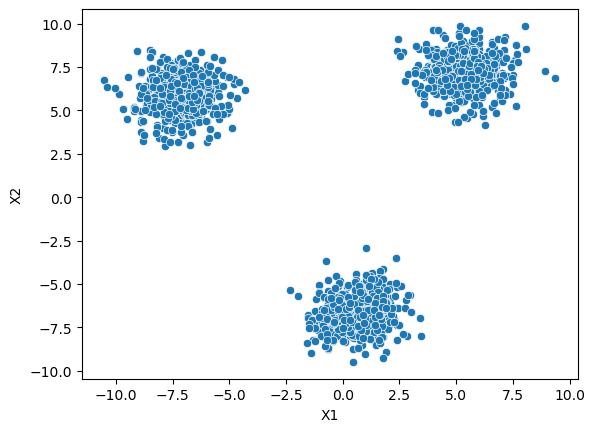

In [5]:
sns.scatterplot(data=blobs,x='X1',y='X2')

In [6]:
moons = pd.read_csv('./Archive/Machine Learning/Dataset/cluster_moons.csv')

In [7]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<Axes: xlabel='X1', ylabel='X2'>

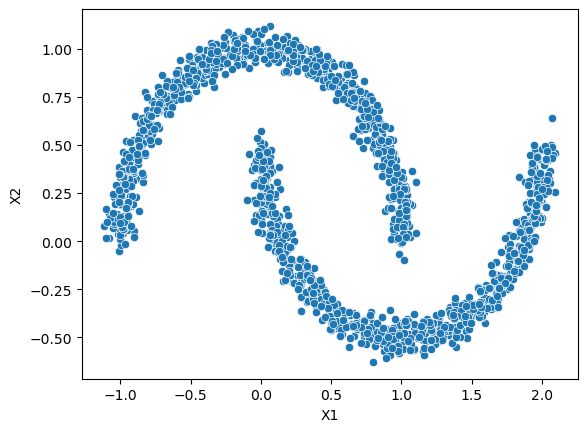

In [8]:
sns.scatterplot(data=moons,x='X1',y='X2')

In [9]:
circles = pd.read_csv('./Archive/Machine Learning/Dataset/cluster_circles.csv')

In [10]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<Axes: xlabel='X1', ylabel='X2'>

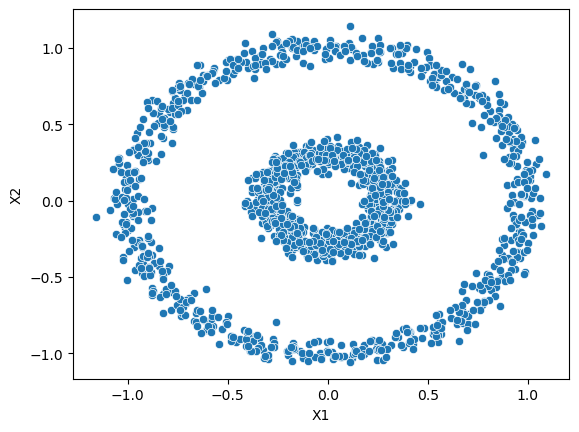

In [11]:
sns.scatterplot(data=circles,x='X1',y='X2')

## Label Discovery

In [15]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data = data, x='X1', y='X2', hue = labels, palette='Set1')

## Kmeans Results

In [16]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)

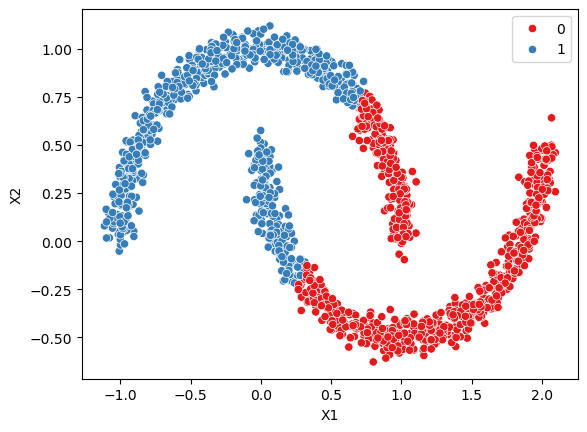

In [17]:
display_categories(model,moons)

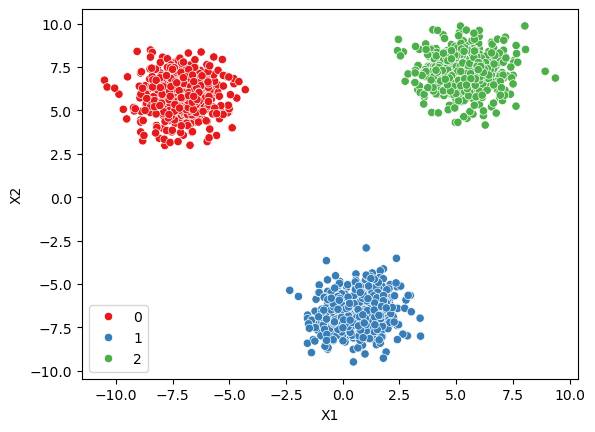

In [18]:
model = KMeans(n_clusters = 3)
display_categories(model,blobs)

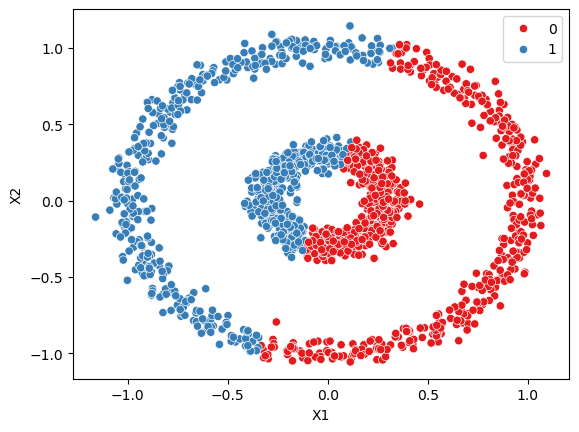

In [19]:
model = KMeans(n_clusters = 2)
display_categories(model,circles)

## DBSCAN Results

In [20]:
from sklearn.cluster import DBSCAN

In [24]:
model = DBSCAN(eps=0.8)

In [22]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |
 |  This implementation has a worst case memory complexity of :math:`O({n}^2)`,
 |  which can occur when the `eps` param is large and `min_samples` is low,
 |  while the original DBSCAN only uses linear memory.
 |  For further details, see the Notes below.
 |
 |  Read more in the :ref:`User Guide <dbscan>`.
 |
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in t

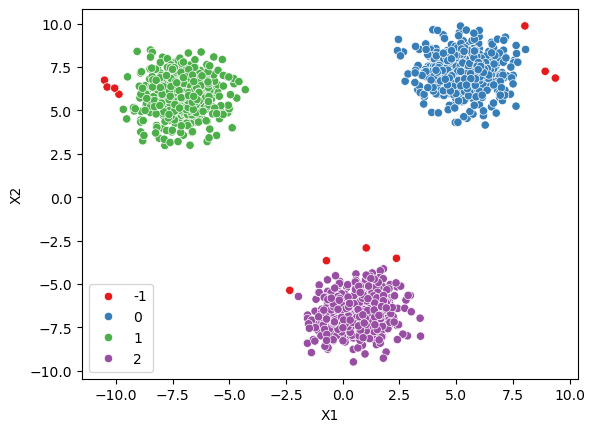

In [25]:
display_categories(model,blobs)

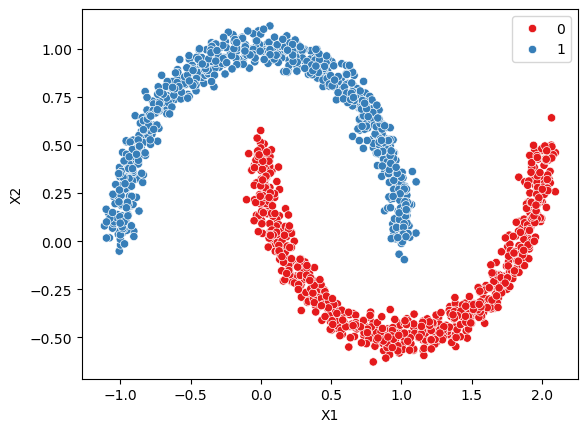

In [27]:
model = DBSCAN(eps=0.2)
display_categories(model,moons)

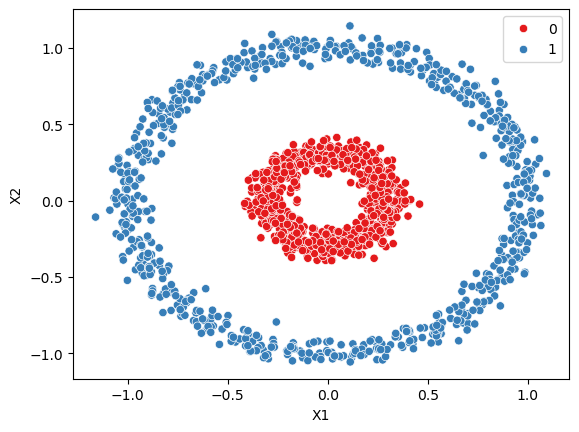

In [28]:
display_categories(model,circles)

# DBSCAN Hyperparameters


Let's explore the hyperparameters for DBSCAN and how they can change results!

## DBSCAN and Clustering Examples

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
two_blobs = pd.read_csv('./Archive/Machine Learning/Dataset/cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('./Archive/Machine Learning/Dataset/cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

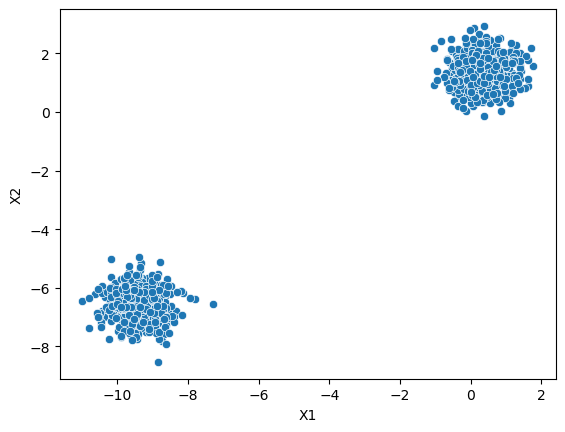

In [32]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

<Axes: xlabel='X1', ylabel='X2'>

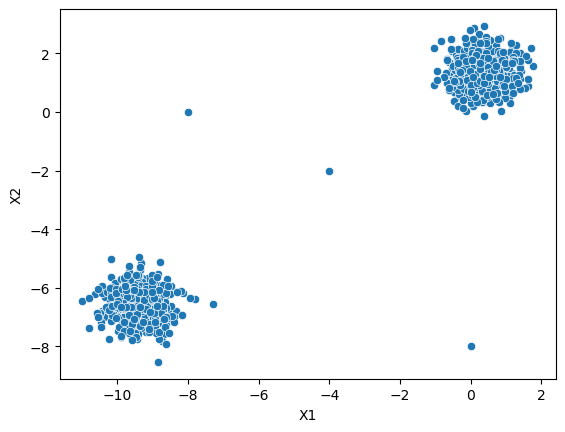

In [33]:
# plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

## Label Discovery

In [34]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

## DBSCAN

In [35]:
from sklearn.cluster import DBSCAN

In [36]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |
 |  This implementation has a worst case memory complexity of :math:`O({n}^2)`,
 |  which can occur when the `eps` param is large and `min_samples` is low,
 |  while the original DBSCAN only uses linear memory.
 |  For further details, see the Notes below.
 |
 |  Read more in the :ref:`User Guide <dbscan>`.
 |
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in t

In [37]:
dbscan = DBSCAN()

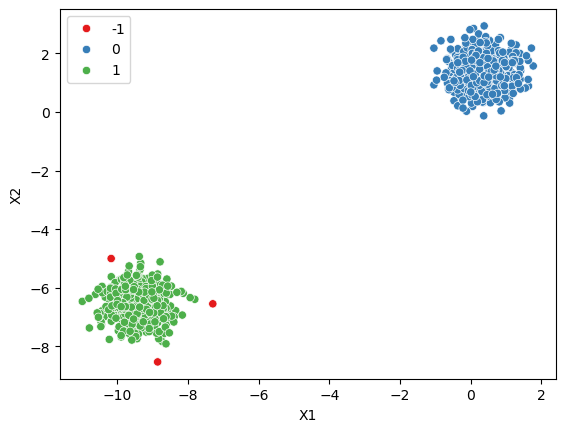

In [38]:
display_catagories(dbscan, two_blobs)

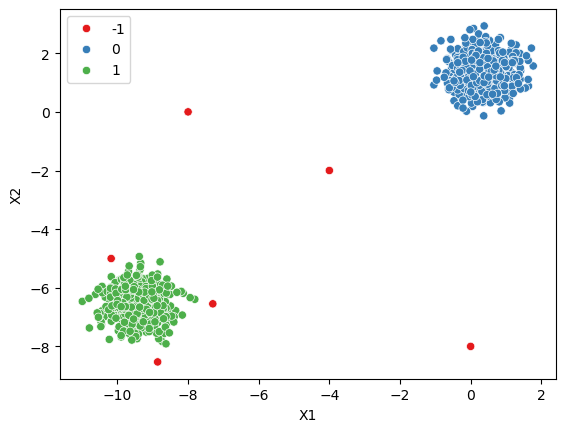

In [39]:
display_catagories(dbscan, two_blobs_outliers)

# Epsilon

    eps : float, default=0.5
     |      The maximum distance between two samples for one to be considered
     |      as in the neighborhood of the other. This is not a maximum bound
     |      on the distances of points within a cluster. This is the most
     |      important DBSCAN parameter to choose appropriately for your data set
     |      and distance function.

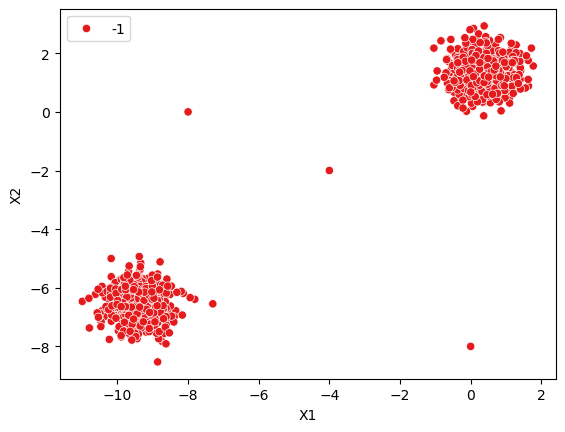

In [40]:
# Tiny Epsilon --> Tiny Max Distance --> Everything is an outlier (class=-1)
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan,two_blobs_outliers)

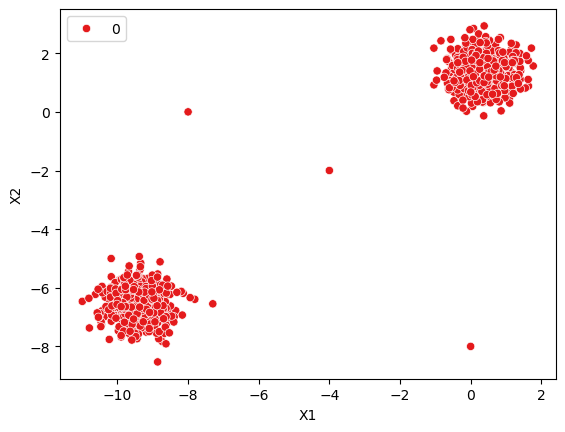

In [41]:
# Huge Epsilon --> Huge Max Distance --> Everything is in the same cluster (class=0)
dbscan = DBSCAN(eps = 10)
display_catagories(dbscan, two_blobs_outliers)

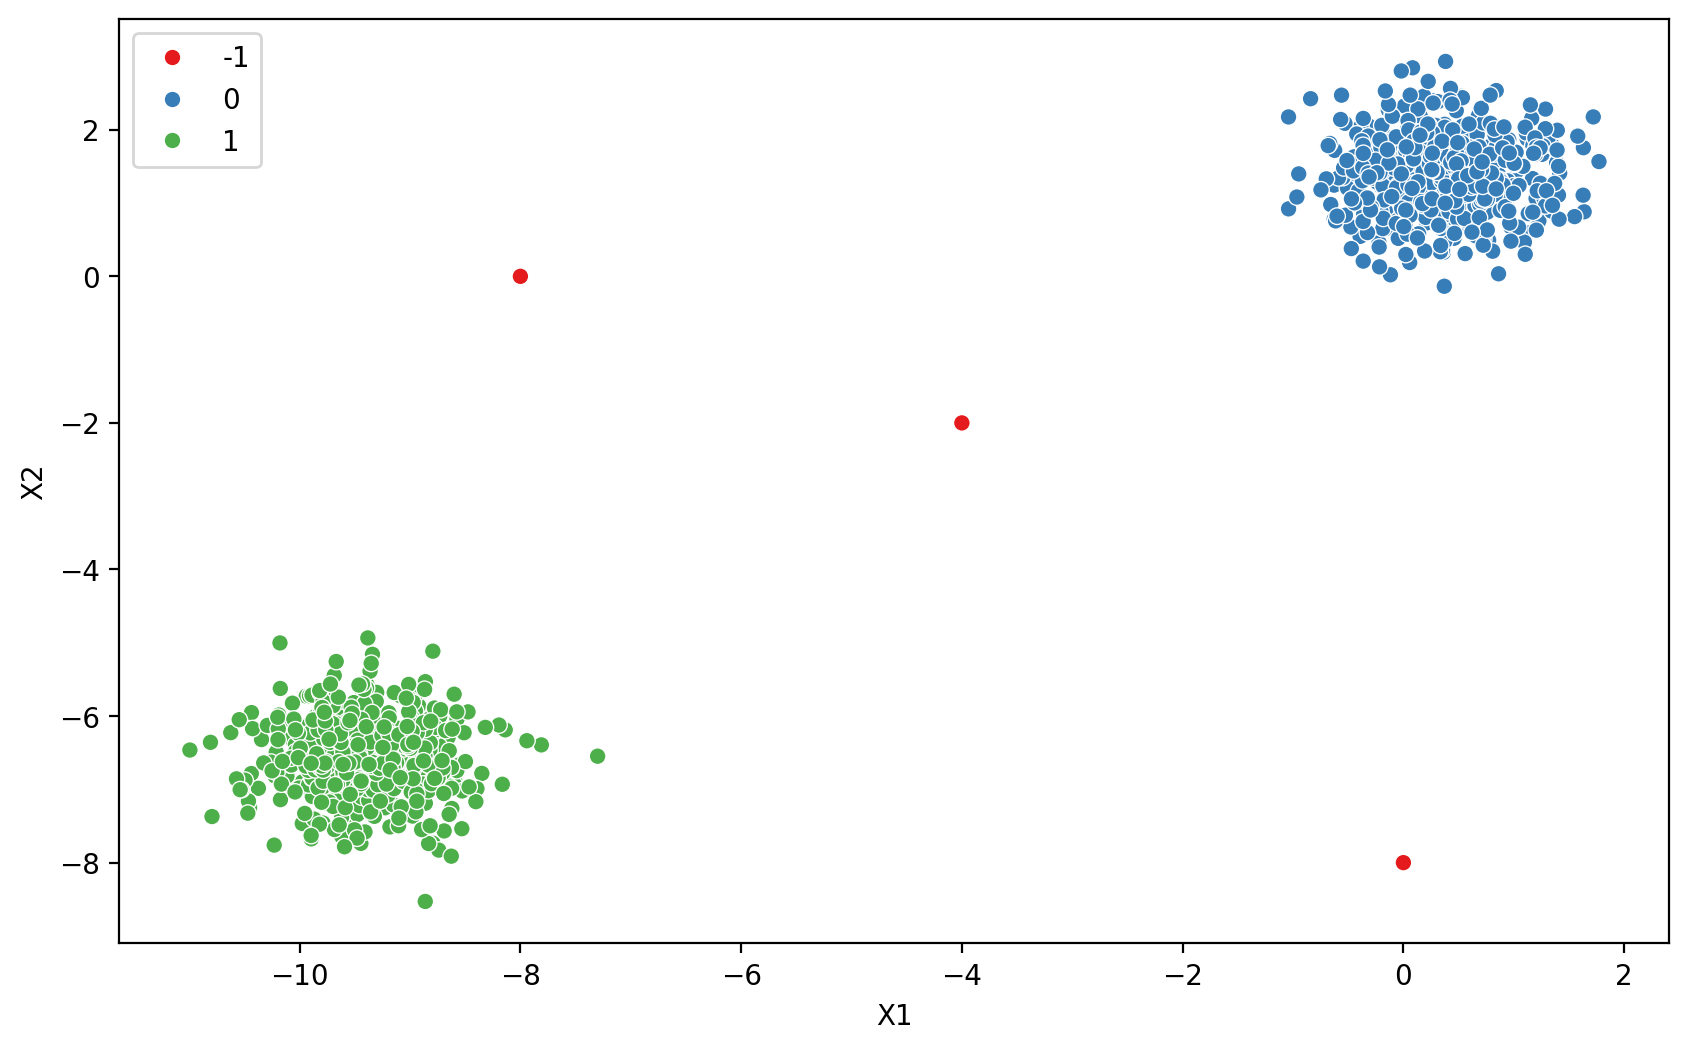

In [42]:
# How to find a good epsilon?
plt.figure(figsize=(10,6),dpi=200)
dbscan = DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outliers)

In [43]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [45]:
dbscan.labels_ == -1

array([False, False, False, ...,  True,  True,  True])

In [46]:
np.sum(dbscan.labels_ == -1)

3

In [48]:
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

0.29910269192422734

## Charting reasonable Epsilon values

In [49]:
# bend the knee! https://raghavan.usc.edu/papers/kneedle-simplex11.pdf

In [50]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

Text(0.5, 0, 'Epsilon Value')

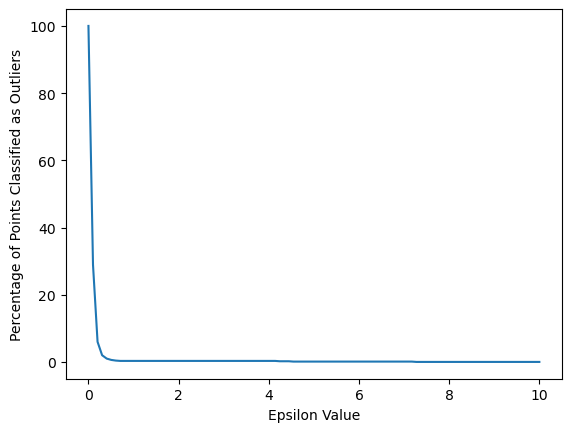

In [51]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

(0.0, 1.0)

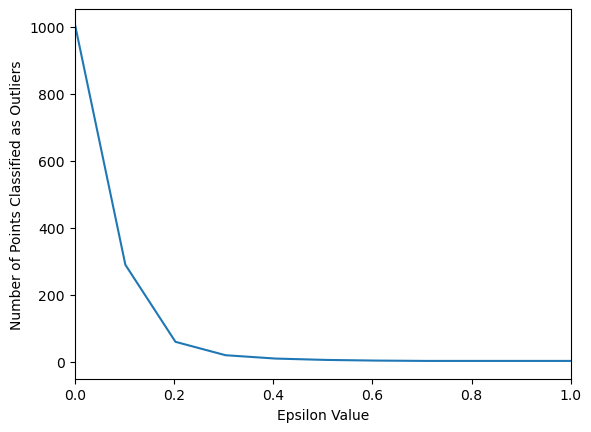

In [52]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylabel("Number of Points Classified as Outliers")
plt.xlabel("Epsilon Value")
plt.xlim(0,1)

## Minimum Samples

     |  min_samples : int, default=5
     |      The number of samples (or total weight) in a neighborhood for a point
     |      to be considered as a core point. This includes the point itself.
     

How to choose minimum number of points?

https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan

In [53]:
outlier_percent = []

for n in np.arange(1,100):
    
    # Create Model
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

Text(0.5, 0, 'Minimum Number of Samples')

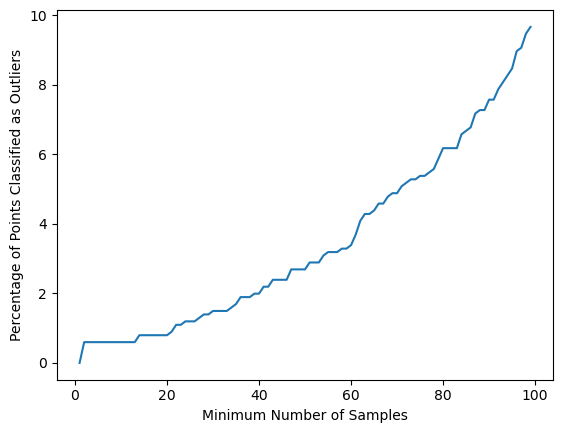

In [54]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Minimum Number of Samples")

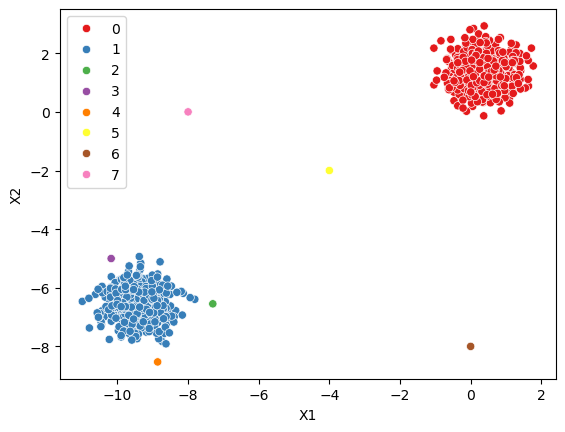

In [55]:
dbscan = DBSCAN(min_samples=1)
display_categories(dbscan,two_blobs_outliers)

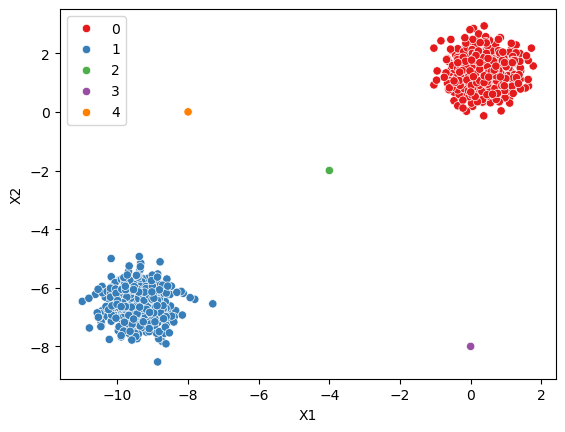

In [56]:
dbscan = DBSCAN(eps=0.75, min_samples=1)
display_catagories(dbscan, two_blobs_outliers)